# EDA of Credit Scoring Time Series Features

## 1. Load Relevant Libraries

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

## 2. Data Loading

In [93]:
DATA_DIR = './'
DATA = 'cleaned_train.csv'

In [94]:
df = pd.read_csv(os.path.join(DATA_DIR, DATA))
df

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.465380,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.465380,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.465380,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.465380,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.465380,High_spent_Medium_value_payments,341.489231,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,155625,37932,4,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,34.663572,378.0,No,35.104023,24.028477,High_spent_Large_value_payments,479.866228,Poor
99996,155626,37932,5,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,40.565631,379.0,No,35.104023,24.028477,High_spent_Medium_value_payments,496.651610,Poor
99997,155627,37932,6,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,41.255522,380.0,No,35.104023,24.028477,High_spent_Large_value_payments,516.809083,Poor
99998,155628,37932,7,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,33.638208,381.0,No,35.104023,24.028477,Low_spent_Large_value_payments,319.164979,Standard


## 3. Cleaning Process I

### - 중복 컬럼 제거

In [95]:
drop_cols = ['ID', 'Name', 'SSN']
cleaned_df = df.drop(drop_cols, axis=1)

### - 대출 상품 리스트 분리

In [96]:
cleaned_df['Type_of_Loan'][9]

'Credit-Builder Loan'

In [97]:
cleaned_df['Type_of_Loan'].str.split(',')

0        [Auto Loan,  Credit-Builder Loan,  Personal Lo...
1        [Auto Loan,  Credit-Builder Loan,  Personal Lo...
2        [Auto Loan,  Credit-Builder Loan,  Personal Lo...
3        [Auto Loan,  Credit-Builder Loan,  Personal Lo...
4        [Auto Loan,  Credit-Builder Loan,  Personal Lo...
                               ...                        
99995                       [Auto Loan,  and Student Loan]
99996                       [Auto Loan,  and Student Loan]
99997                       [Auto Loan,  and Student Loan]
99998                       [Auto Loan,  and Student Loan]
99999                       [Auto Loan,  and Student Loan]
Name: Type_of_Loan, Length: 100000, dtype: object

In [98]:
import re

In [99]:
search = ' and '
space = ' '

In [100]:
def search_and_remove(li, search_word):

    for i, word in enumerate(li):
        if search_word in word:
            li[i] = re.sub(search_word, '', word)
            # li[i] = re.sub(space, '', word)
        # else:
            # li[i] = re.sub(space, '', word)
    return li

def white_space_remover(li, ws):

    for i, word in enumerate(li):
        if ws in word:
            li[i] = re.sub(ws, '', word)
    return li

In [101]:
search_and_remove(['Auto Loan',  'Credit-Builder Loan',  'Personal Loan',  ' and Home Equity Loan'], search)

['Auto Loan', 'Credit-Builder Loan', 'Personal Loan', 'Home Equity Loan']

In [102]:
cleaned_df['Type_of_Loan'] = cleaned_df['Type_of_Loan'].str.split(',').apply(lambda x :  search_and_remove(x, search))
cleaned_df['Type_of_Loan'] = cleaned_df['Type_of_Loan'].apply(lambda x :  white_space_remover(x, space))

In [103]:
cleaned_df['Type_of_Loan']

0        [AutoLoan, Credit-BuilderLoan, PersonalLoan, H...
1        [AutoLoan, Credit-BuilderLoan, PersonalLoan, H...
2        [AutoLoan, Credit-BuilderLoan, PersonalLoan, H...
3        [AutoLoan, Credit-BuilderLoan, PersonalLoan, H...
4        [AutoLoan, Credit-BuilderLoan, PersonalLoan, H...
                               ...                        
99995                              [AutoLoan, StudentLoan]
99996                              [AutoLoan, StudentLoan]
99997                              [AutoLoan, StudentLoan]
99998                              [AutoLoan, StudentLoan]
99999                              [AutoLoan, StudentLoan]
Name: Type_of_Loan, Length: 100000, dtype: object

In [104]:
cleaned_df['Type_of_Loan'][0]

['AutoLoan', 'Credit-BuilderLoan', 'PersonalLoan', 'HomeEquityLoan']

In [105]:
type_of_loans = cleaned_df['Type_of_Loan']

In [106]:
pd.get_dummies(type_of_loans.apply(pd.Series).stack()).sum(axis=1)

0      0    1
       1    1
       2    1
       3    1
1      0    1
           ..
99997  1    1
99998  0    1
       1    1
99999  0    1
       1    1
Length: 364696, dtype: int64

In [107]:
# OHE for Loan Types
loan_dummy_df = pd.get_dummies(type_of_loans.apply(pd.Series).stack()).sum(level=0)
loan_dummy_df

/var/folders/rm/1g600byx25b_ht2r9ty6b4_00000gn/T/ipykernel_35285/4009385760.py:2: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  loan_dummy_df = pd.get_dummies(type_of_loans.apply(pd.Series).stack()).sum(level=0)


,AutoLoan,Credit-BuilderLoan,DebtConsolidationLoan,HomeEquityLoan,MortgageLoan,NoData,NotSpecified,PaydayLoan,PersonalLoan,StudentLoan
0,1,1,0,1,0,0,0,0,1,0
1,1,1,0,1,0,0,0,0,1,0
2,1,1,0,1,0,0,0,0,1,0
3,1,1,0,1,0,0,0,0,1,0
4,1,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
99995,1,0,0,0,0,0,0,0,0,1
99996,1,0,0,0,0,0,0,0,0,1
99997,1,0,0,0,0,0,0,0,0,1
99998,1,0,0,0,0,0,0,0,0,1


In [108]:
# OHE 연결
cleaned_df = pd.concat([cleaned_df, loan_dummy_df], axis=1)
cleaned_df

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,AutoLoan,Credit-BuilderLoan,DebtConsolidationLoan,HomeEquityLoan,MortgageLoan,NoData,NotSpecified,PaydayLoan,PersonalLoan,StudentLoan
0,3392,1,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,...,1,1,0,1,0,0,0,0,1,0
1,3392,2,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,...,1,1,0,1,0,0,0,0,1,0
2,3392,3,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,...,1,1,0,1,0,0,0,0,1,0
3,3392,4,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,...,1,1,0,1,0,0,0,0,1,0
4,3392,5,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,...,1,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,37932,4,25.0,Mechanic,39628.99,3359.415833,4.0,6.0,7.0,2.0,...,1,0,0,0,0,0,0,0,0,1
99996,37932,5,25.0,Mechanic,39628.99,3359.415833,4.0,6.0,7.0,2.0,...,1,0,0,0,0,0,0,0,0,1
99997,37932,6,25.0,Mechanic,39628.99,3359.415833,4.0,6.0,7.0,2.0,...,1,0,0,0,0,0,0,0,0,1
99998,37932,7,25.0,Mechanic,39628.99,3359.415833,4.0,6.0,7.0,2.0,...,1,0,0,0,0,0,0,0,0,1


In [109]:
# cleaned_df = pd.concat([cleaned_df, loan_dummy_df], axis=1)
cols = cleaned_df.columns.tolist()
y_index = cols.index('Credit_Score')
new_cols = cols[:y_index] + cols[y_index + 1: ] + cols[y_index].split()
new_cols

['Customer_ID',
 'Month',
 'Age',
 'Occupation',
 'Annual_Income',
 'Monthly_Inhand_Salary',
 'Num_Bank_Accounts',
 'Num_Credit_Card',
 'Interest_Rate',
 'Num_of_Loan',
 'Type_of_Loan',
 'Delay_from_due_date',
 'Num_of_Delayed_Payment',
 'Changed_Credit_Limit',
 'Num_Credit_Inquiries',
 'Credit_Mix',
 'Outstanding_Debt',
 'Credit_Utilization_Ratio',
 'Credit_History_Age',
 'Payment_of_Min_Amount',
 'Total_EMI_per_month',
 'Amount_invested_monthly',
 'Payment_Behaviour',
 'Monthly_Balance',
 'AutoLoan',
 'Credit-BuilderLoan',
 'DebtConsolidationLoan',
 'HomeEquityLoan',
 'MortgageLoan',
 'NoData',
 'NotSpecified',
 'PaydayLoan',
 'PersonalLoan',
 'StudentLoan',
 'Credit_Score']

In [110]:
cleaned_df = cleaned_df[new_cols]
cleaned_df

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Credit-BuilderLoan,DebtConsolidationLoan,HomeEquityLoan,MortgageLoan,NoData,NotSpecified,PaydayLoan,PersonalLoan,StudentLoan,Credit_Score
0,3392,1,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,...,1,0,1,0,0,0,0,1,0,Good
1,3392,2,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,...,1,0,1,0,0,0,0,1,0,Good
2,3392,3,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,...,1,0,1,0,0,0,0,1,0,Good
3,3392,4,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,...,1,0,1,0,0,0,0,1,0,Good
4,3392,5,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,...,1,0,1,0,0,0,0,1,0,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,37932,4,25.0,Mechanic,39628.99,3359.415833,4.0,6.0,7.0,2.0,...,0,0,0,0,0,0,0,0,1,Poor
99996,37932,5,25.0,Mechanic,39628.99,3359.415833,4.0,6.0,7.0,2.0,...,0,0,0,0,0,0,0,0,1,Poor
99997,37932,6,25.0,Mechanic,39628.99,3359.415833,4.0,6.0,7.0,2.0,...,0,0,0,0,0,0,0,0,1,Poor
99998,37932,7,25.0,Mechanic,39628.99,3359.415833,4.0,6.0,7.0,2.0,...,0,0,0,0,0,0,0,0,1,Standard


## Payment Behaviour Decomposition

In [111]:
cleaned_df['Payment_Behaviour'].value_counts()

Low_spent_Small_value_payments      28616
High_spent_Medium_value_payments    19738
High_spent_Large_value_payments     14726
Low_spent_Medium_value_payments     14399
High_spent_Small_value_payments     11764
Low_spent_Large_value_payments      10757
Name: Payment_Behaviour, dtype: int64

In [43]:
spending_behaviour = cleaned_df['Payment_Behaviour'].str.split('_').apply(lambda x : ''.join(x[:1]))
spending_behaviour.name = 'Spending_Behaviour'
spending_behaviour

0        High
1         Low
2         Low
3         Low
4        High
         ... 
99995    High
99996    High
99997    High
99998     Low
99999    High
Name: Spending_Behaviour, Length: 100000, dtype: object

In [44]:
print(spending_behaviour.unique())

['High' 'Low']


In [45]:
repay_behaviour = cleaned_df['Payment_Behaviour'].str.split('_').apply(lambda x : ''.join(x[2:3]))
repay_behaviour.name = 'Repay_Behaviour'
repay_behaviour

0         Small
1         Large
2        Medium
3         Small
4        Medium
          ...  
99995     Large
99996    Medium
99997     Large
99998     Large
99999    Medium
Name: Repay_Behaviour, Length: 100000, dtype: object

In [46]:
print(repay_behaviour.unique())

['Small' 'Large' 'Medium']


In [47]:
spending_dict = {
    'Low': 0,
    'High': 1,
}

repay_dict = {
    'Small': 0,
    'Medium': 1,
    'Large': 2
}

In [48]:
cleaned_df['Spending_Behaviour'] = spending_behaviour.map(spending_dict)
cleaned_df['Repay_Behaviour'] = repay_behaviour.map(repay_dict)

In [49]:
cleaned_df

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,HomeEquityLoan,MortgageLoan,NoData,NotSpecified,PaydayLoan,PersonalLoan,StudentLoan,Spending_Behaviour,Repay_Behaviour,Credit_Score
0,3392,1,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,...,1,0,0,0,0,1,0,1,0,Good
1,3392,2,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,...,1,0,0,0,0,1,0,0,2,Good
2,3392,3,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,...,1,0,0,0,0,1,0,0,1,Good
3,3392,4,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,...,1,0,0,0,0,1,0,0,0,Good
4,3392,5,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,...,1,0,0,0,0,1,0,1,1,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,37932,4,25.0,Mechanic,39628.99,3359.415833,4.0,6.0,7.0,2.0,...,0,0,0,0,0,0,1,1,2,Poor
99996,37932,5,25.0,Mechanic,39628.99,3359.415833,4.0,6.0,7.0,2.0,...,0,0,0,0,0,0,1,1,1,Poor
99997,37932,6,25.0,Mechanic,39628.99,3359.415833,4.0,6.0,7.0,2.0,...,0,0,0,0,0,0,1,1,2,Poor
99998,37932,7,25.0,Mechanic,39628.99,3359.415833,4.0,6.0,7.0,2.0,...,0,0,0,0,0,0,1,0,2,Standard


In [50]:
# cleaned_df = pd.concat([cleaned_df, loan_dummy_df], axis=1)
cols = cleaned_df.columns.tolist()
y_index = cols.index('Credit_Score')
new_cols = cols[:y_index] + cols[y_index + 1: ] + cols[y_index].split()
new_cols

['Customer_ID',
 'Month',
 'Age',
 'Occupation',
 'Annual_Income',
 'Monthly_Inhand_Salary',
 'Num_Bank_Accounts',
 'Num_Credit_Card',
 'Interest_Rate',
 'Num_of_Loan',
 'Type_of_Loan',
 'Delay_from_due_date',
 'Num_of_Delayed_Payment',
 'Changed_Credit_Limit',
 'Num_Credit_Inquiries',
 'Credit_Mix',
 'Outstanding_Debt',
 'Credit_Utilization_Ratio',
 'Credit_History_Age',
 'Payment_of_Min_Amount',
 'Total_EMI_per_month',
 'Amount_invested_monthly',
 'Payment_Behaviour',
 'Monthly_Balance',
 'AutoLoan',
 'Credit-BuilderLoan',
 'DebtConsolidationLoan',
 'HomeEquityLoan',
 'MortgageLoan',
 'NoData',
 'NotSpecified',
 'PaydayLoan',
 'PersonalLoan',
 'StudentLoan',
 'Spending_Behaviour',
 'Repay_Behaviour',
 'Credit_Score']

In [51]:
cleaned_df = cleaned_df[new_cols]
cleaned_df

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,HomeEquityLoan,MortgageLoan,NoData,NotSpecified,PaydayLoan,PersonalLoan,StudentLoan,Spending_Behaviour,Repay_Behaviour,Credit_Score
0,3392,1,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,...,1,0,0,0,0,1,0,1,0,Good
1,3392,2,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,...,1,0,0,0,0,1,0,0,2,Good
2,3392,3,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,...,1,0,0,0,0,1,0,0,1,Good
3,3392,4,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,...,1,0,0,0,0,1,0,0,0,Good
4,3392,5,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,...,1,0,0,0,0,1,0,1,1,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,37932,4,25.0,Mechanic,39628.99,3359.415833,4.0,6.0,7.0,2.0,...,0,0,0,0,0,0,1,1,2,Poor
99996,37932,5,25.0,Mechanic,39628.99,3359.415833,4.0,6.0,7.0,2.0,...,0,0,0,0,0,0,1,1,1,Poor
99997,37932,6,25.0,Mechanic,39628.99,3359.415833,4.0,6.0,7.0,2.0,...,0,0,0,0,0,0,1,1,2,Poor
99998,37932,7,25.0,Mechanic,39628.99,3359.415833,4.0,6.0,7.0,2.0,...,0,0,0,0,0,0,1,0,2,Standard


### Label Dictionary of Credit Score

In [52]:
np.unique(cleaned_df['Credit_Score'])

array(['Good', 'Poor', 'Standard'], dtype=object)

Good > Standard > Poor 순으로 정렬 필요.

In [53]:
# label2idx 딕셔너리 생성
label2idx = {'Poor': 0, 'Standard': 1, 'Good': 2}

# cleaned_df['Credit_Score'].map(label2idx)
cleaned_df['Credit_Score'] = cleaned_df['Credit_Score'].map(label2idx)
cleaned_df['Credit_Score']

0        2
1        2
2        2
3        2
4        2
        ..
99995    0
99996    0
99997    0
99998    1
99999    0
Name: Credit_Score, Length: 100000, dtype: int64

In [54]:
# idx to label dictionary
idx2label = {}
for idx, value in label2idx.items():
    idx2label[value] = idx

idx2label

{0: 'Poor', 1: 'Standard', 2: 'Good'}

### 3) Pivot Table for the Change of Credit Score of Customers

- row : Customer
- column : Month
- values : Credit Score

In [55]:
pivot = pd.pivot(data=cleaned_df, index='Customer_ID', columns='Month', values='Credit_Score')
pivot

Month,1,2,3,4,5,6,7,8
Customer_ID,,,,,,,,
1006,0,0,0,0,0,0,0,0
1007,1,1,1,1,1,1,1,0
1008,1,1,1,1,1,1,1,1
1009,1,1,1,1,1,1,1,1
1011,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...
50984,0,0,0,0,1,0,0,0
50990,0,0,1,0,0,0,0,0
50992,1,1,1,1,1,1,1,1


In [56]:
customer_id = pivot.index

In [57]:
customer_id

Int64Index([ 1006,  1007,  1008,  1009,  1011,  1013,  1014,  1015,  1017,
             1019,
            ...
            50970, 50975, 50979, 50982, 50983, 50984, 50990, 50992, 50996,
            50999],
           dtype='int64', name='Customer_ID', length=12500)

### 4) Customers Having ever Changed Credit Score

#### First Difference : Ever Changed vs Negatively Changed vs Positively Changed

Check List:
- Payment Behaviour 분해한 것 확인,
- 대출의 개수는 늘었는지

이거 체크 필요

##### 신용 변동이 있었는가? (Ever Changed?)

In [58]:
# 상승이든 하락이든 변화가 있던 고객들 확인
credit_changes = np.diff(pivot, axis=1)
credit_changes

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0, -1],
       [ 0,  0,  0, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]])

In [59]:
# 데이터 내 신용등급 변화 고객 아이디 추출
credit_changed_customer_list = np.abs(credit_changes).mean(axis=1) > 0
changed_customer_series = pd.Series(credit_changed_customer_list, index=customer_id)
changed_customer_series

Customer_ID
1006     False
1007      True
1008     False
1009     False
1011     False
         ...  
50984     True
50990     True
50992    False
50996    False
50999    False
Length: 12500, dtype: bool

In [60]:
changed_customer_id = changed_customer_series[ changed_customer_series == True].index
changed_customer_id

Int64Index([ 1007,  1013,  1014,  1017,  1019,  1029,  1039,  1041,  1043,
             1045,
            ...
            50946, 50957, 50958, 50962, 50965, 50966, 50975, 50983, 50984,
            50990],
           dtype='int64', name='Customer_ID', length=7292)

In [61]:
print(1006 in changed_customer_id)
print(1007 in changed_customer_id)

False
True


값 제대로 할당된 것 확인 완료

In [62]:
cleaned_df['credit_ever_changes'] = 0
cleaned_df.loc[ cleaned_df['Customer_ID'].isin(changed_customer_id), 'credit_ever_changes'] = 1
cleaned_df[['Customer_ID', 'credit_ever_changes']]

,Customer_ID,credit_ever_changes
0,3392,1
1,3392,1
2,3392,1
3,3392,1
4,3392,1
...,...,...
99995,37932,1
99996,37932,1
99997,37932,1
99998,37932,1


In [63]:
cleaned_df.groupby('credit_ever_changes')['Credit_Score'].describe()

,count,mean,std,min,25%,50%,75%,max
credit_ever_changes,,,,,,,,
0,41664.0,0.921275,0.512470,0.0,1.0,1.0,1.0,2.0
1,58336.0,0.864749,0.769689,0.0,0.0,1.0,1.0,2.0


In [64]:
idx2label

{0: 'Poor', 1: 'Standard', 2: 'Good'}

기본적으로 credit score가 변경되었던 고객보다 변경되지 않은 고객들의 credit score가 더 건강했음 (평균이 살짝 더 높음)
하지만 연봉 등과 같은 지표에서는 변동이 있던 고객이 더 높게 잡힘

##### 신용 하락이 있었는가?

In [65]:
credit_changes

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0, -1],
       [ 0,  0,  0, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]])

In [66]:
credit_changes.shape

(12500, 7)

In [67]:
credit_changes[:, 0] == -1

array([False, False, False, ..., False, False, False])

In [68]:
first_period_negatively_changed = credit_changes[:, 0] == -1
first_period_negatively_changed

array([False, False, False, ..., False, False, False])

In [69]:
first_period_negatively_changed_customer_series = pd.Series(first_period_negatively_changed, index=customer_id)
first_period_negatively_changed_customer_series

Customer_ID
1006     False
1007     False
1008     False
1009     False
1011     False
         ...  
50984    False
50990    False
50992    False
50996    False
50999    False
Length: 12500, dtype: bool

In [70]:
first_period_negatively_changed_customer_id = first_period_negatively_changed_customer_series.loc[ first_period_negatively_changed == 1 ].index
first_period_negatively_changed_customer_id

Int64Index([ 1041,  1103,  1147,  1251,  1363,  1371,  1415,  1454,  1645,
             1752,
            ...
            50460, 50476, 50566, 50610, 50647, 50664, 50701, 50742, 50882,
            50883],
           dtype='int64', name='Customer_ID', length=766)

In [71]:
print(1645 in first_period_negatively_changed_customer_id)
print(1653 in first_period_negatively_changed_customer_id)

True
False


In [72]:
cleaned_df.loc[ cleaned_df['Customer_ID'].isin(first_period_negatively_changed_customer_id), ['Credit_Mix', 'Num_Credit_Inquiries', 'Num_of_Loan', 'Num_Credit_Card', 'Num_of_Delayed_Payment', 'Spending_Behaviour', 'Repay_Behaviour', 'Credit_Score'] ]

,Credit_Mix,Num_Credit_Inquiries,Num_of_Loan,Num_Credit_Card,Num_of_Delayed_Payment,Spending_Behaviour,Repay_Behaviour,Credit_Score
240,Good,4.0,2.0,5.0,6.0,0,2,2
241,Good,4.0,2.0,5.0,6.0,1,2,1
242,Good,4.0,2.0,5.0,3.0,1,1,2
243,Good,4.0,2.0,5.0,6.0,1,0,2
244,Good,4.0,2.0,5.0,7.0,0,2,1
...,...,...,...,...,...,...,...,...
99875,Good,5.0,4.0,4.0,11.0,0,1,2
99876,Good,5.0,4.0,4.0,11.0,1,2,2
99877,Good,5.0,4.0,4.0,11.0,1,2,2
99878,Good,5.0,4.0,4.0,12.0,1,2,2


In [75]:
cleaned_df.loc[ cleaned_df['Customer_ID'].isin(first_period_negatively_changed_customer_id), ['Customer_ID','Monthly_Balance', 'Spending_Behaviour', 'Repay_Behaviour', 'Credit_Score'] ].groupby('Customer_ID').apply(lambda x : x[:2])

Customer_ID  Monthly_Balance  Spending_Behaviour  \
Customer_ID                                                           
1041        75632         1041       648.983166                   1   
            75633         1041       500.076715                   0   
1103        7000          1103       335.472622                   0   
            7001          1103       325.834292                   1   
1147        35696         1147       261.328349                   1   
...                        ...              ...                 ...   
50742       80657        50742       325.935023                   0   
50882       73208        50882       156.540622                   0   
            73209        50882       409.647767                   1   
50883       49336        50883       180.115712                   0   
            49337        50883       257.443829                   1   

                   Repay_Behaviour  Credit_Score  
Customer_ID                                       
1041        75632                1             1  
            75633                2             0  
1103        7000                 0             1  
            7001                 1             0  
1147        35696                1             1  
...                            ...           ...  
50742       80657                2             1  
50882       73208                0             1  
            73209                1             0  
50883       49336                2             1  
            49337                0             0  

[1532 rows x 5 columns]

In [77]:
first_period_negatively_changed_df = cleaned_df.loc[ cleaned_df['Customer_ID'].isin(first_period_negatively_changed_customer_id), ['Monthly_Balance', 'Spending_Behaviour', 'Repay_Behaviour', 'Credit_Score', 'Customer_ID'] ].copy()
first_period_negatively_changed_df

,Monthly_Balance,Spending_Behaviour,Repay_Behaviour,Credit_Score,Customer_ID
240,334.667909,0,2,2,39537
241,336.263108,1,2,1,39537
242,362.591773,1,1,2,39537
243,294.158416,1,0,2,39537
244,270.079092,0,2,1,39537
...,...,...,...,...,...
99875,752.038503,0,1,2,14421
99876,904.515208,1,2,2,14421
99877,767.996604,1,2,2,14421
99878,810.510608,1,2,2,14421


In [78]:
first_period_negatively_changed_df.groupby('Customer_ID')[['Monthly_Balance', 'Spending_Behaviour', 'Repay_Behaviour', 'Credit_Score']].apply(lambda x: x[:2])

Monthly_Balance  Spending_Behaviour  Repay_Behaviour  \
Customer_ID                                                               
1041        75632       648.983166                   1                1   
            75633       500.076715                   0                2   
1103        7000        335.472622                   0                0   
            7001        325.834292                   1                1   
1147        35696       261.328349                   1                1   
...                            ...                 ...              ...   
50742       80657       325.935023                   0                2   
50882       73208       156.540622                   0                0   
            73209       409.647767                   1                1   
50883       49336       180.115712                   0                2   
            49337       257.443829                   1                0   

                   Credit_Score  
Customer_ID                      
1041        75632             1  
            75633             0  
1103        7000              1  
            7001              0  
1147        35696             1  
...                         ...  
50742       80657             1  
50882       73208             1  
            73209             0  
50883       49336             1  
            49337             0  

[1532 rows x 4 columns]

In [79]:
negative = first_period_negatively_changed_df.groupby('Customer_ID')[
        ['Monthly_Balance', 'Spending_Behaviour', 'Repay_Behaviour', 'Credit_Score']].apply(lambda x: x[:2])

negative.columns

Index(['Monthly_Balance', 'Spending_Behaviour', 'Repay_Behaviour',
       'Credit_Score'],
      dtype='object')

In [82]:
# Spending Behaviour Proportion for those who negatively changed
negative['Spending_Behaviour'].value_counts(normalize=True)

0    0.552872
1    0.447128
Name: Spending_Behaviour, dtype: float64

In [ ]:
# Spending Behaviour of Raw Data
cleaned_df['Spending_Behaviour'].value_counts(normalize=True)

통계적으로 유의미한지는 확인해봐야겠지만, 신용등급이 떨어진 친구들의 지출은 적어졌음

In [86]:
# Repay Behaviour Proportion for those who negatively changed
negative['Repay_Behaviour'].value_counts(normalize=True)

0    0.417102
1    0.348564
2    0.234334
Name: Repay_Behaviour, dtype: float64

In [87]:
# Repay Behaviour Proportion for those who negatively changed
cleaned_df['Repay_Behaviour'].value_counts(normalize=True)

0    0.40380
1    0.34137
2    0.25483
Name: Repay_Behaviour, dtype: float64

통계적으로 유의미한지는 확인해봐야겠지만, 신용등급이 떨어진 친구들의 대출 상환 액수 또한 줄어들었음 --> 크레딧 하락이 있던 그룹군에서 large 와 medium이 줄어들고, low가 커짐

In [88]:
first_period_negative_diff = negative.groupby('Customer_ID').diff().dropna()
first_period_negative_diff

,,Monthly_Balance,Spending_Behaviour,Repay_Behaviour,Credit_Score
Customer_ID,,,,,
1041,75633,-148.906451,-1.0,1.0,-1.0
1103,7001,-9.638330,1.0,1.0,-1.0
1147,35697,-55.079212,0.0,0.0,-1.0
1251,38889,-10.110327,0.0,0.0,-1.0
1363,15617,103.885933,1.0,1.0,-1.0
...,...,...,...,...,...
50664,95049,297.628936,1.0,1.0,-1.0
50701,66569,-17.768004,0.0,-2.0,-1.0
50742,80657,120.185291,0.0,2.0,-1.0


<AxesSubplot:>

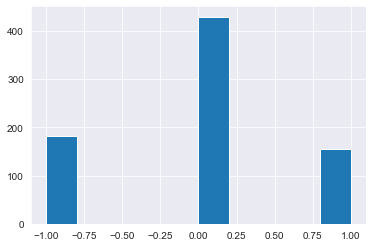

In [89]:
first_period_negative_diff.hist()

/var/folders/rm/1g600byx25b_ht2r9ty6b4_00000gn/T/ipykernel_35285/2710406476.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  first_period_negative_diff.hist(ax=ax)


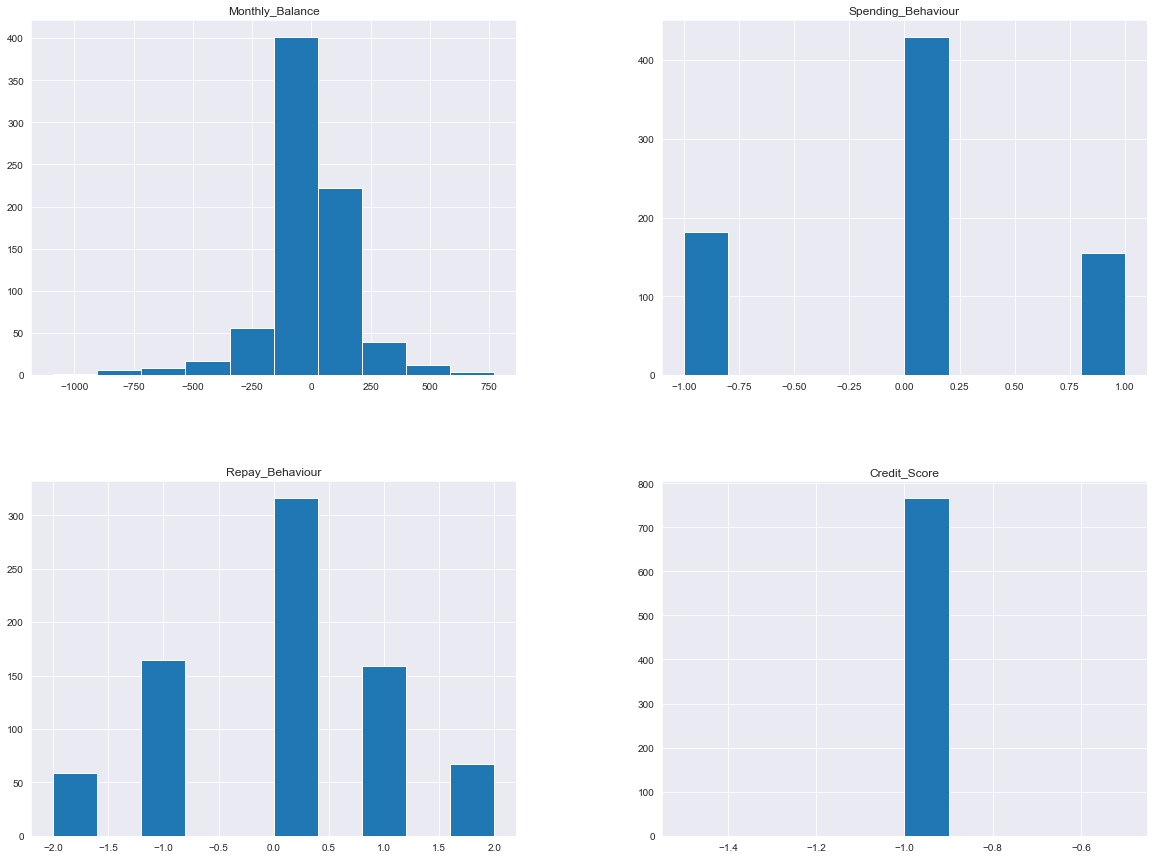

In [91]:
fig, ax = plt.subplots(1, 1, figsize=(20, 15))
first_period_negative_diff.hist(ax=ax)
fig.savefig('./1st_diff_spending_repay_behaviour.png')
plt.show()

신용 변동 이후 지출액과 대출상환액 또한 유의미한 변화는 없었음. 변화는 랜덤으로 이뤄져있을뿐..
